In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MACCSkeys

In [2]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    rawdata = [x for x in reader]
lig_MOLECULES = [Chem.MolFromSmiles(x['Smiles']) for x in rawdata]

Načtení erbB1

In [3]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [17:21:01] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:21:01] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [17:21:01] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [17:21:01] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [17:21:01] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:21:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:21:02] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [17:21:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:21:02] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [17:21:02] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [17:21:02] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [17:21:02] Can't kek

RDKit ERROR: [17:21:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [17:21:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:21:02] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [17:21:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:21:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [17:21:02] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [17:21:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [17:21:02] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [17:21:02] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [17:21:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [17:21:02] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [17:21:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:21:04] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [17:21:04] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [17:21:04] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [17:21:04] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [17:21:04] ERROR: Could not sanitize molecule ending on line 1151592


7113

Načtení drugbanku

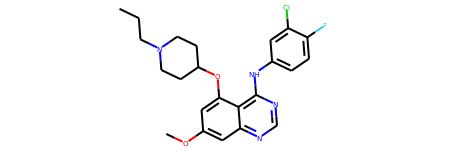

In [4]:
lig_MOLECULES[3344]

Počáteční cvičení jsem pojal trochu z jiného úhlu, pokusil jsem se zjistit počet analogů náhodné molekuly (3344) tím, že jsem přidával složitost znaku, který jsem sledoval.

PYRIMIDIN -> CHINAZOLIN -> CHINAZOLINYLAMIN -> AMINOCHINAZOLINOL

Nejprve tedy definice znaků a následně jejich zvýraznění v náhodné molekule (3344)

In [5]:
pyrimidine_pattern = Chem.MolFromSmiles('C1=CN=CN=C1')
quinazoline_pattern = Chem.MolFromSmiles('C1=CC=C2C(=C1)C=NC=N2')
quinazolinylamine_pattern = Chem.MolFromSmiles('C1=CC=CC2=C1C(=NC=N2)N')
aminoquinazolinol_pattern = Chem.MolFromSmiles('C1(=CC=CC2=C1C(=NC=N2)N)O')

In [6]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def VisualizeMatch(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

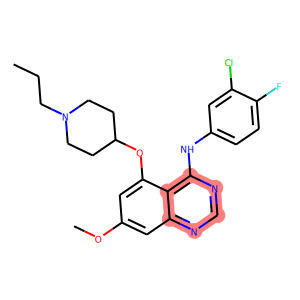

In [7]:
VisualizeMatch(lig_MOLECULES[3344],pyrimidine_pattern)

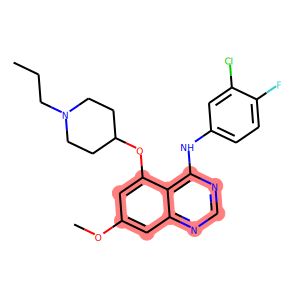

In [8]:
VisualizeMatch(lig_MOLECULES[3344],quinazoline_pattern)

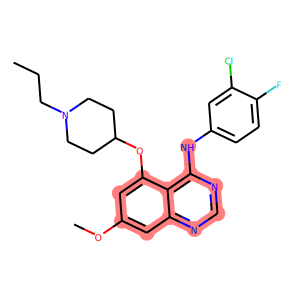

In [9]:
VisualizeMatch(lig_MOLECULES[3344],quinazolinylamine_pattern)

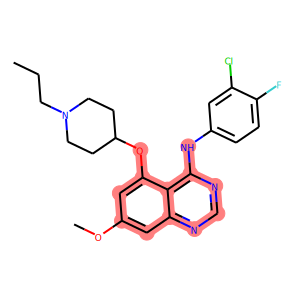

In [10]:
VisualizeMatch(lig_MOLECULES[3344],aminoquinazolinol_pattern)

In [11]:
CustomKey = [pyrimidine_pattern, quinazoline_pattern, quinazolinylamine_pattern, aminoquinazolinol_pattern]
erbB1_ligands_keys = [[x.HasSubstructMatch(substruct) for substruct in CustomKey] for x in lig_MOLECULES]
len(erbB1_ligands_keys), erbB1_ligands_keys

(12496,
 [[True, False, False, False],
  [False, False, False, False],
  [True, True, True, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [True, True, True, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [True, True, True, False],
  [False, False, False, False],
  [True, False, False, False],
  [True, False, F

In [12]:
erbB1_keys = []
overview = [0, 0, 0, 0]
for y in lig_MOLECULES:
    key = []
    for i, j in enumerate(CustomKey):
        if y.HasSubstructMatch(j):
            key.append(1)
            x = overview[i]
            overview[i] = x+1
        else:
            key.append(0)
    erbB1_keys.append(key)
print(overview)
len(erbB1_keys)

[7882, 3540, 3403, 87]


12496

No tak nejnáročnějším podmínkám odpovídá pouze 87 látek, ale malý rozdíl mezi 2. a 3. úrovní značí, že 30 % látek možná bude mít společný základ a to CHINAZINOLINYLAMIN

Pojďme se zkusit podívat jak podobné je si těch 87 analogů ;-)

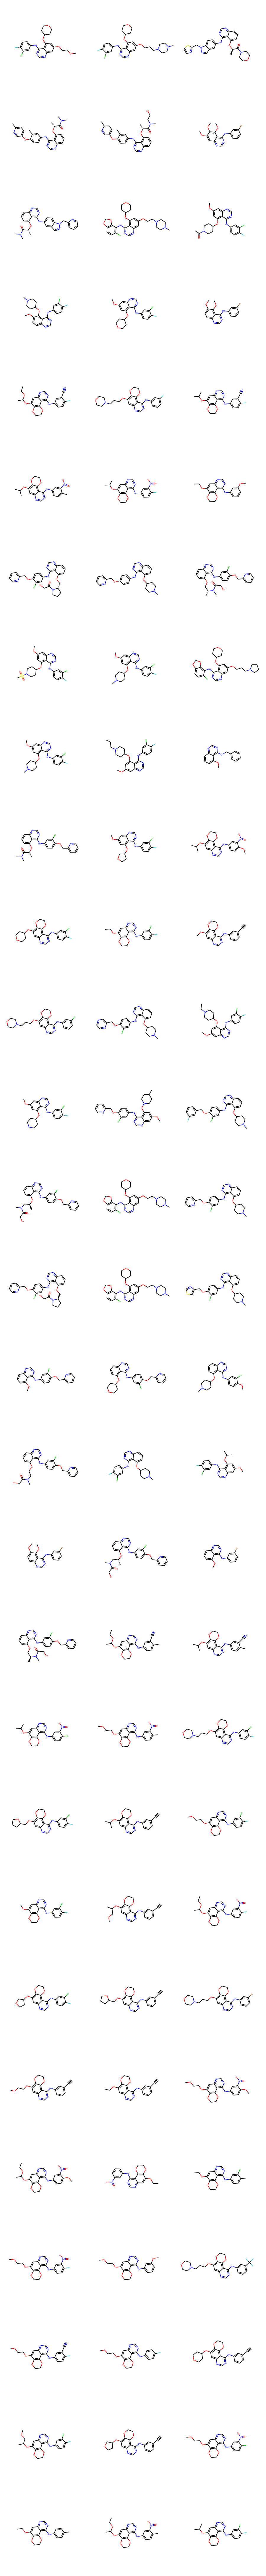

In [13]:
erbB1_analogues = [x for x in lig_MOLECULES if x.HasSubstructMatch(aminoquinazolinol_pattern)]
Draw.MolsToGridImage(erbB1_analogues, molsPerRow=3, subImgSize=(300,300), maxMols=87)

Po letmém projetí listu těchto látek si myslím, že je možné mluvit společném základu.

A teď už se podíváme na MACCS key

In [14]:
erbB1_MACCSkey = [MACCSkeys.GenMACCSKeys(x) for x in lig_MOLECULES]
drugbank_MACCSkey = [MACCSkeys.GenMACCSKeys(x) for x in drugs]
erbB1_MACCSkey[0].GetNumBits()

167

In [15]:
list(erbB1_MACCSkey[0].GetOnBits())

[38,
 43,
 52,
 53,
 65,
 69,
 77,
 79,
 80,
 83,
 84,
 87,
 94,
 96,
 98,
 101,
 103,
 105,
 107,
 120,
 121,
 124,
 125,
 131,
 133,
 134,
 135,
 137,
 142,
 145,
 151,
 156,
 158,
 161,
 162,
 163,
 165]

In [16]:
erbB1_MACCSkey[3344].ToBitString()

'00000000000000000000000000000000000000100010000000000000000000000100000000010100100001110100010001101101010110010111001011100111110011110110001111011111110111111111110'

In [17]:
erbB1_ligands_MACCSkey_sums = [0]*erbB1_MACCSkey[0].GetNumBits()
for key in erbB1_MACCSkey:
    for onbit in key.GetOnBits():
        erbB1_ligands_MACCSkey_sums[onbit] += 1
erbB1_ligands_MACCSkey_sums

[0,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 102,
 0,
 1,
 132,
 1,
 33,
 119,
 2,
 19,
 593,
 17,
 381,
 1,
 30,
 154,
 346,
 700,
 2265,
 126,
 48,
 83,
 41,
 29,
 0,
 357,
 363,
 1822,
 5,
 1080,
 672,
 8128,
 85,
 124,
 1046,
 3695,
 639,
 37,
 238,
 1919,
 1296,
 106,
 522,
 1048,
 780,
 1892,
 2221,
 1217,
 749,
 415,
 2473,
 752,
 852,
 749,
 789,
 4373,
 406,
 905,
 10456,
 637,
 931,
 206,
 1067,
 558,
 760,
 3425,
 964,
 1979,
 5306,
 1172,
 9445,
 666,
 5145,
 10258,
 2037,
 2425,
 5804,
 1805,
 5933,
 5563,
 6616,
 2387,
 1889,
 2705,
 4122,
 6303,
 6478,
 2807,
 5186,
 5943,
 7377,
 10050,
 3906,
 6780,
 9587,
 1553,
 3995,
 3090,
 9615,
 4149,
 7065,
 1787,
 4378,
 6885,
 6904,
 2044,
 7540,
 1419,
 3232,
 3372,
 7052,
 6457,
 1025,
 10429,
 11012,
 6893,
 1575,
 3362,
 11668,
 6853,
 8152,
 4741,
 5151,
 1485,
 8469,
 4636,
 10390,
 7257,
 10329,
 2954,
 11262,
 6253,
 2736,
 2917,
 2520,
 11368,
 8152,
 8977,
 11664,
 5669,
 6507,
 7326,
 5514,
 9039,
 11012,
 8044,
 8301,
 7529,


In [18]:
drugbank_MACCSkey_sums = [0]*drugbank_MACCSkey[0].GetNumBits() 
for key in drugbank_MACCSkey:
    for onbit in key.GetOnBits():
        drugbank_MACCSkey_sums[onbit] += 1
drugbank_MACCSkey_sums

[0,
 0,
 0,
 30,
 0,
 1,
 11,
 24,
 99,
 46,
 22,
 117,
 30,
 60,
 33,
 11,
 52,
 77,
 68,
 282,
 7,
 21,
 181,
 212,
 435,
 564,
 224,
 96,
 149,
 726,
 126,
 21,
 431,
 481,
 153,
 44,
 625,
 521,
 1312,
 153,
 167,
 166,
 698,
 1198,
 266,
 246,
 194,
 455,
 869,
 713,
 646,
 601,
 553,
 1895,
 2246,
 663,
 178,
 1633,
 669,
 604,
 685,
 695,
 1753,
 207,
 624,
 2507,
 1118,
 782,
 133,
 1551,
 295,
 526,
 2196,
 755,
 1184,
 2092,
 797,
 2245,
 703,
 2263,
 2296,
 1228,
 2080,
 2781,
 2109,
 2498,
 1685,
 1310,
 1596,
 2474,
 3533,
 3342,
 2825,
 1650,
 1481,
 3191,
 3098,
 2783,
 3056,
 1145,
 2845,
 2775,
 1934,
 786,
 3210,
 2939,
 2665,
 1534,
 1732,
 2372,
 3113,
 3377,
 2725,
 2292,
 1097,
 1828,
 1896,
 3354,
 3347,
 924,
 3223,
 3762,
 2973,
 2791,
 2463,
 3448,
 2547,
 3821,
 2689,
 2850,
 1791,
 4638,
 3554,
 2717,
 1637,
 2198,
 3264,
 4492,
 2581,
 4291,
 3262,
 1352,
 4169,
 3821,
 2802,
 3698,
 4375,
 3396,
 3793,
 2507,
 3939,
 4407,
 3963,
 4550,
 4670,
 4851,
 5254

In [19]:
erbB1_ligands_MACCSkey_scaled = [x/len(erbB1_MACCSkey) for x in erbB1_ligands_MACCSkey_sums]
erbB1_ligands_MACCSkey_scaled

[0.0,
 0.0,
 0.0,
 0.001120358514724712,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008162612035851472,
 0.0,
 8.002560819462228e-05,
 0.01056338028169014,
 8.002560819462228e-05,
 0.002640845070422535,
 0.00952304737516005,
 0.00016005121638924455,
 0.0015204865556978234,
 0.04745518565941101,
 0.0013604353393085787,
 0.03048975672215109,
 8.002560819462228e-05,
 0.002400768245838668,
 0.01232394366197183,
 0.02768886043533931,
 0.056017925736235596,
 0.18125800256081948,
 0.010083226632522407,
 0.0038412291933418692,
 0.006642125480153649,
 0.0032810499359795134,
 0.0023207426376440463,
 0.0,
 0.028569142125480153,
 0.029049295774647887,
 0.14580665813060179,
 0.0004001280409731114,
 0.08642765685019206,
 0.05377720870678617,
 0.6504481434058899,
 0.006802176696542894,
 0.009923175416133162,
 0.0837067861715749,
 0.29569462227912935,
 0.05113636363636364,
 0.0029609475032010245,
 0.0190460947503201,
 0.15356914212548015,
 0.10371318822023047,
 0.008482714468629962,
 0.04177336747759283,
 0.083866837

In [20]:
drugbank_MACCSkey_scaled = [x/len(drugbank_MACCSkey) for x in drugbank_MACCSkey_sums]
drugbank_MACCSkey_scaled

[0.0,
 0.0,
 0.0,
 0.004217629692113032,
 0.0,
 0.00014058765640376775,
 0.0015464642204414453,
 0.003374103753690426,
 0.013918177983973008,
 0.006467032194573317,
 0.0030929284408828905,
 0.016448755799240825,
 0.004217629692113032,
 0.008435259384226065,
 0.004639392661324336,
 0.0015464642204414453,
 0.007310558132995923,
 0.010825249543090117,
 0.009559960635456208,
 0.0396457191058625,
 0.0009841135948263741,
 0.0029523407844791226,
 0.025446365809081963,
 0.029804583157598763,
 0.06115563053563897,
 0.079291438211725,
 0.03149163503444397,
 0.013496415014761703,
 0.020947560804161394,
 0.10206663854913539,
 0.017714044706874738,
 0.0029523407844791226,
 0.0605932799100239,
 0.0676226627302123,
 0.021509911429776464,
 0.006185856881765781,
 0.08786728525235485,
 0.07324616898636299,
 0.1844510052017433,
 0.021509911429776464,
 0.023478138619429215,
 0.023337550963025446,
 0.0981301841698299,
 0.16842401237171375,
 0.03739631660340222,
 0.03458456347532687,
 0.027274005342330942,


In [21]:
erbB1_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(erbB1_ligands_MACCSkey_scaled, drugbank_MACCSkey_scaled))]
erbB1_drugbank_differences

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, -0.0030972711773883206),
 (4, 0.0),
 (5, -0.00014058765640376775),
 (6, -0.0015464642204414453),
 (7, -0.003374103753690426),
 (8, -0.005755565948121535),
 (9, -0.006467032194573317),
 (10, -0.003012902832688268),
 (11, -0.005885375517550685),
 (12, -0.00413760408391841),
 (13, -0.0057944143138035295),
 (14, 0.004883654713835715),
 (15, -0.0013864130040522008),
 (16, -0.0057900715772981),
 (17, 0.03662993611632089),
 (18, -0.00819952529614763),
 (19, -0.009155962383711413),
 (20, -0.0009040879866317518),
 (21, -0.0005515725386404545),
 (22, -0.013122422147110133),
 (23, -0.002115722722259454),
 (24, -0.005137704799403377),
 (25, 0.10196656434909447),
 (26, -0.021408408401921566),
 (27, -0.009655185821419835),
 (28, -0.014305435324007746),
 (29, -0.09878558861315588),
 (30, -0.015393302069230692),
 (31, -0.0029523407844791226),
 (32, -0.03202413778454375),
 (33, -0.0385733669555644),
 (34, 0.12429674670082533),
 (35, -0.005785728840792669),
 (36, -0

In [22]:
erbB1_drugbank_differences.sort(key=lambda x: x[1])
erbB1_drugbank_differences

[(139, -0.3843115696080809),
 (90, -0.28022691990805815),
 (123, -0.2663398161163857),
 (140, -0.2251622360853772),
 (136, -0.22248246389498372),
 (112, -0.21952902055045917),
 (54, -0.21836871111000702),
 (104, -0.20400724773471163),
 (89, -0.19664548806327992),
 (146, -0.1614058239111702),
 (84, -0.15205314456425295),
 (102, -0.14761675795863843),
 (91, -0.13997839072315876),
 (130, -0.13295446445013398),
 (69, -0.1326641311385818),
 (132, -0.12864981126872171),
 (43, -0.11728764873535011),
 (48, -0.11368795894624421),
 (66, -0.10620068743943795),
 (155, -0.1054062141724238),
 (108, -0.10049205904753572),
 (29, -0.09878558861315588),
 (82, -0.0983602254478779),
 (159, -0.08920818952800169),
 (53, -0.0886767330848838),
 (124, -0.07722130297215984),
 (49, -0.058465631538293567),
 (154, -0.0540315513082843),
 (119, -0.04787674611759356),
 (78, -0.045536067394230294),
 (106, -0.04263985591655317),
 (114, -0.0406683210467642),
 (33, -0.0385733669555644),
 (60, -0.03636336409880882),
 (67,

Po porovnání drugbanku s mým setem molekul jsem zjistil, že nejméně zastoupené jsou znaky

139   OH 
90    QHAACH2A

123   OCO

140   O>3

136   O=A>1

112   AA(A)(A)A

54    QHAAQH

104   QHACH2A

89    OAAAO

zatímco nejvíce jsou oproti molekulám v drugbanku zastoupené

135   Nnot%A%A

80    NAAAN

65    C%N

38    NC(C)N

133   A$A!N

125   AROMATIC RING

77    NAN

145   6M RING

In [23]:
list(erbB1_MACCSkey[3344].GetOnBits())

[38,
 42,
 65,
 75,
 77,
 80,
 85,
 86,
 87,
 89,
 93,
 97,
 98,
 100,
 101,
 103,
 105,
 107,
 108,
 111,
 113,
 114,
 115,
 118,
 120,
 121,
 122,
 125,
 126,
 127,
 128,
 129,
 132,
 133,
 134,
 135,
 137,
 138,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

Po porovnání listu znaků náhodně vybrané sloučeniny 3344 jsem zjistil, že obsahuje všechny nejčastěji se vyskytující znaky a 1 z nejméně častých znaků.